## Analysis of Global Sea Ice trends
Our planet faces many potential impacts from the climate changing. One very apparent effect is a reduction in polar ice mass. The exact reprocussions of this type of change can be hard to predict and quantify, but the tracking of overall ice coverage can be done very accurately through satelite imaging. Using the NOAA index for sea ice, we can make some very meaningful analysis on what is happening in our north and south poles.

Using the NSIDC index, https://nsidc.org/data/g02135/versions/3#anchor-documentation, we can easily take measures of sea ice extent. Though this is not an exact measurement for mass of ice, sea ice extent is a measurement for area in which local water and air flows can sustain ice, and can give us an understanding of whether ice is forming and expanding more or less over time.

Arctic Sea Ice Minimum, September 21st, 1979


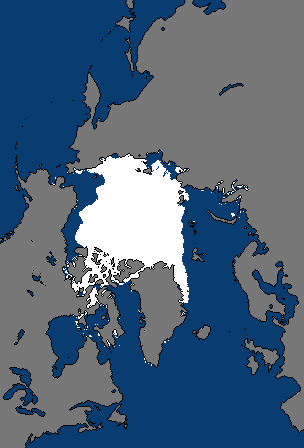

Arctic Sea Ice, September 21st, 2025


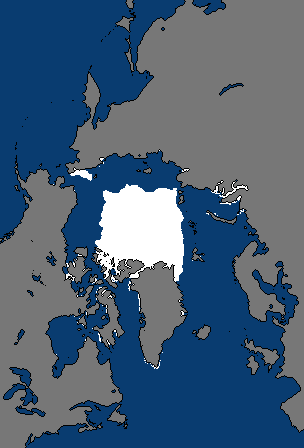

Antarctic Sea Ice Minimum, March 5th, 1979


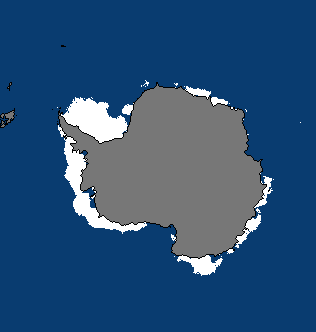

Antarctic Sea Ice, March 5th, 2025


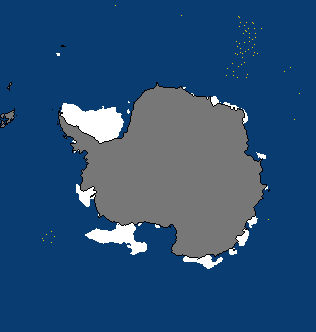

Arctic Sea Ice Maximum, February 22nd, 1979


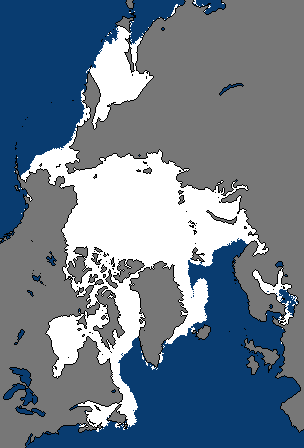

Arctic Sea Ice, February 22nd, 2025


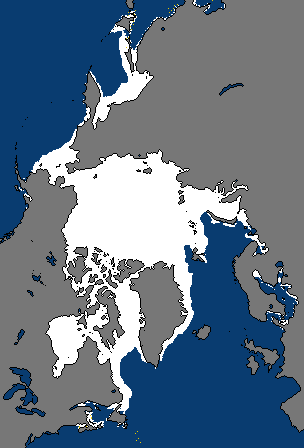

Antarctic Sea Ice Maximum, September 5th, 1979


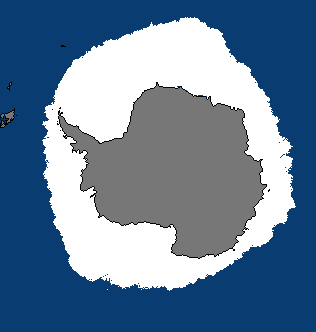

Antarctic Sea Ice, September 5th, 2024


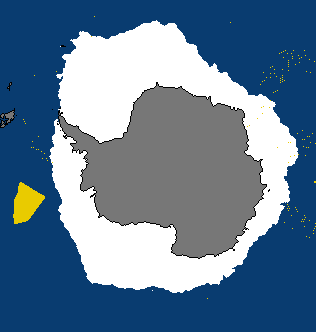

In [1]:
import os
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
# here we display a few figures of sea ice for comparison
os.chdir('/Users/sam/school/python/climMat586/project/data')
ntif1 = os.getcwd() + '/N_19790921_extent_v3.0.tif'
ntif2 = os.getcwd() + '/N_20240921_extent_v3.0.tif'
ntif3 = os.getcwd() + '/N_19790305_extent_v3.0.tif'
ntif4 = os.getcwd() + '/N_20250305_extent_v3.0.tif'
stif1 = os.getcwd() + '/S_19790223_extent_v3.0.tif'
stif2 = os.getcwd() + '/S_20250223_extent_v3.0.tif'
stif3 = os.getcwd() + '/S_19790905_extent_v3.0.tif'
stif4 = os.getcwd() + '/S_20240905_extent_v3.0.tif'

img1 = Image.open(ntif1, 'r')
img2 = Image.open(ntif2, 'r')
img3 = Image.open(stif1, 'r')
img4 = Image.open(stif2, 'r')

img5 = Image.open(ntif3, 'r')
img6 = Image.open(ntif4, 'r')
img7 = Image.open(stif3, 'r')
img8 = Image.open(stif4, 'r')
print('Arctic Sea Ice Minimum, September 21st, 1979')
display(img1)
print('Arctic Sea Ice, September 21st, 2025')
display(img2)
print('Antarctic Sea Ice Minimum, March 5th, 1979')
display(img3)
print('Antarctic Sea Ice, March 5th, 2025')
display(img4)
print('Arctic Sea Ice Maximum, February 22nd, 1979')
display(img5)
print('Arctic Sea Ice, February 22nd, 2025')
display(img6)
print('Antarctic Sea Ice Maximum, September 5th, 1979')
display(img7)
print('Antarctic Sea Ice, September 5th, 2024')
display(img8)


Given that breif snapshot, it can be seen that our oceans are not maintaining as much ice coverage as they did 45 years ago, what we are  going to attempt to do is explore the data around sea ice extent and try to explore climate factors that can have relationships with it.

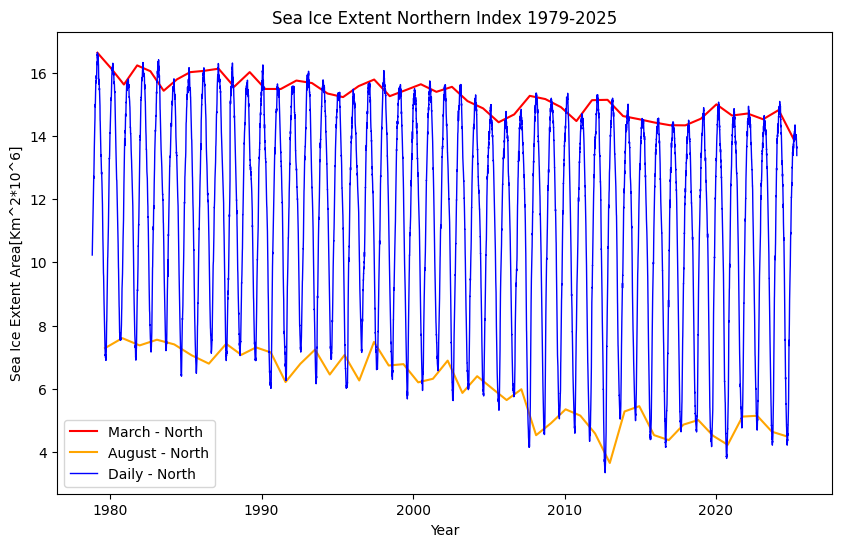

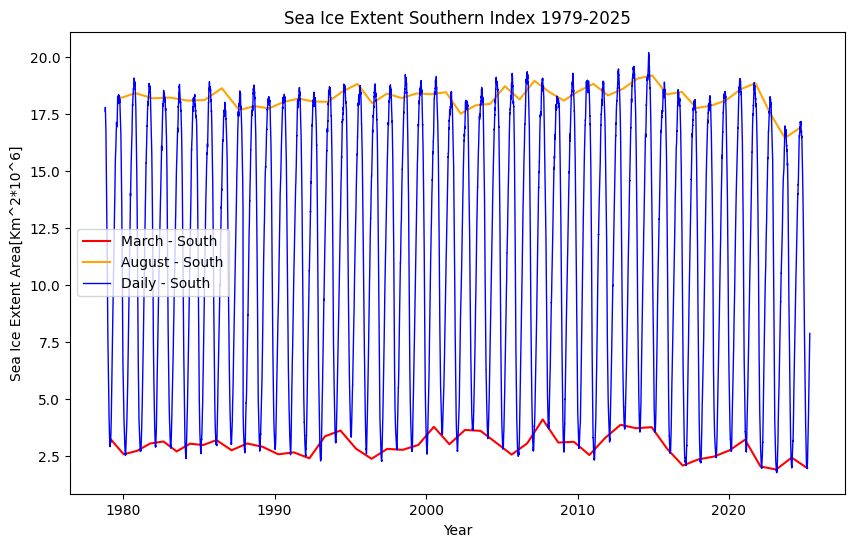

In [23]:

north = os.getcwd() + '/N_seaice_extent_daily_v3.0.csv'
south = os.getcwd() + '/S_seaice_extent_daily_v3.0.csv'

# print(pd.read_csv(south))
def plot(data, c1, c2, c3):
    set = pd.read_csv(data)
    # bidaily, and daily
    d1 = set[:1611]
    d2 = set[1611:]
    dataplot = pd.to_numeric(set['     Extent'], errors='coerce')
    marslice1 = d1[(d1[' Month'] == '    03') & ((d1[' Day'] == '  01') | (d1[' Day'] == '  02'))]
    marslice2 = d2[(d2[' Month'] == '    03') & (d2[' Day'] == '  01')]

    marplot1 = pd.to_numeric(marslice1['     Extent'], errors='coerce')
    marplot2 = pd.to_numeric(marslice2['     Extent'], errors='coerce')
    marplot = pd.concat([marplot1, marplot2])


    augslice1 = d1[(d1[' Month'] == '    08') & ((d1[' Day'] == '  30') | (d1[' Day'] == '  31'))]
    augslice2 = d2[(d2[' Month'] == '    08') & (d2[' Day'] == '  31')]

    augplot1 = pd.to_numeric(augslice1['     Extent'], errors='coerce')
    augplot2 = pd.to_numeric(augslice2['     Extent'], errors='coerce')
    augplot = pd.concat([augplot1, augplot2])
    # Daily data from August 20th till current date
    t1 = np.linspace((1978+(299/365)), (1987+(231/365)), 1611)
    t2 = np.linspace((1987+(231/365)), (2025+(122/365)), 13724)
    t = np.concat((t1, t2))

    # Custom time linspace for March 1st 1980-2025
    tmarch = np.concat((np.linspace((1979+(60/365)), (1986+(60/365)), 9)
                        , np.linspace((1987+(60/365)), (2025+(60/365)), 38)))
    # Custom time linspaces for August 31st 1980-2025
    taug = np.concat((np.linspace((1979+(243/365)), (1987+(243/365)), 8)
                    , np.linspace((1988+(243/365)), (2024+(243/365)), 38)))
    if data == north:
        plt.plot(tmarch, marplot, label='March - North', color=c1, lw=1.5)
        plt.plot(taug, augplot, label='August - North', color=c2, lw=1.5)
        plt.plot(t, dataplot, label='Daily - North', color=c3, lw=1)
    elif data == south:
        plt.plot(tmarch, marplot, label='March - South', color=c1, lw=1.5)
        plt.plot(taug, augplot, label='August - South', color=c2, lw=1.5)
        plt.plot(t, dataplot, label='Daily - South', color=c3, lw=1)
# set = pd.read_csv(south)
# d1 = set[:1611]
# d2 = set[1611:]
# marslice1 = d1[(d1[' Month'] == '    03') & ((d1[' Day'] == '  01') | (d1[' Day'] == '  02'))]
# marslice2 = d2[(d2[' Month'] == '    03') & (d2[' Day'] == '  01')]
# t1 = np.linspace((1979+(299/365)), (1987+(231/365)), 1611)
# t2 = np.linspace((1987+(231/365)), (2025+(122/365)), 13724)
# t = np.concat((t1, t2))
# print(d2)

plt.figure(figsize=(10, 6))

plot(north, 'red', 'orange', 'blue')
# plot(south, 'yellow', 'purple', 'green')

plt.xlabel('Year')
plt.ylabel('Sea Ice Extent Area[Km^2*10^6]')
plt.title('Sea Ice Extent Northern Index 1979-2025')
# plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 6))

plot(south, 'red', 'orange', 'blue')
# plot(south, 'yellow', 'purple', 'green')

plt.xlabel('Year')
plt.ylabel('Sea Ice Extent Area[Km^2*10^6]')
plt.title('Sea Ice Extent Southern Index 1979-2025')
# plt.grid(True)
plt.legend()
# plt.show()


In [ ]:
# import cdsapi

# dataset = "reanalysis-era5-single-levels-monthly-means"
# request = {
#     "product_type": ["reanalysis"],
#     "variable": [
#         "2m_temperature",
#         # "sea_surface_temperature"
#     ],
#     #"1940", "1941", "1942",
#     # "1943", "1944", "1945",
#     # "1946", "1947", "1948",
#     # "1949", "1950", "1951",
#     # "1952", "1953", "1954",
#     # "1955", "1956", "1957",
#     # "1958", "1959", "1960",
#     # "1961", "1962", "1963",
#     # "1964", "1965", "1966",
#     # "1967", "1968", "1969",
#     # "1970", "1971", "1972",
#     # "1973", "1974", "1975",
#     # "1976", "1977",
#     "year": [
#          "1978",
#         "1979", "1980", "1981",
#         "1982", "1983", "1984",
#         "1985", "1986", "1987",
#         "1988", "1989", "1990",
#         "1991", "1992", "1993",
#         "1994", "1995", "1996",
#         "1997", "1998", "1999",
#         "2000", "2001", "2002",
#         "2003", "2004", "2005",
#         "2006", "2007", "2008",
#         "2009", "2010", "2011",
#         "2012", "2013", "2014",
#         "2015", "2016"
#         # , "2017",
#         # "2018", "2019", "2020",
#         # "2021", "2022", "2023",
#         # "2024", "2025"
#     ],
#     "month": [
#         "01", 
#         "02", 
#         "03",
#         "04", "05", "06",
#         "07", 
#         "08", "09",
#         "10", "11", "12"
#     ],
#     "day": [
#         "01", "02", "03",
#         "04", "05", "06",
#         "07", "08", "09",
#         "10", "11", "12",
#         "13", "14", "15",
#         "16", "17", "18",
#         "19", "20", "21",
#         "22", "23", "24",
#         "25", "26", "27",
#         "28", "29", "30",
#         "31"
#     ],
#     "time": [
#         "00:00",
#         # "01:00", "02:00",
#         # "03:00", "04:00", "05:00",
#         # "06:00", "07:00", "08:00",
#         # "09:00", "10:00", "11:00",
#         # "12:00", "13:00", "14:00",
#         # "15:00", "16:00", "17:00",
#         # "18:00", "19:00", "20:00",
#         # "21:00", "22:00", "23:00"
#     ],
#     "data_format": "netcdf",
#     "download_format": "unarchived",
#     "area": [15, -180, -15, 180]
# }

# client = cdsapi.Client()
# client.retrieve(dataset, request).download() # 'bc44e76a66addf12045d34122c60fb5a.nc'


2025-05-04 22:54:09,602 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-04 22:54:09,603 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-04 22:54:11,204 INFO Request ID is 9d7242fe-b016-462a-89a7-47ce5f14a72f
2025-05-04 22:54:11,416 INFO status has been updated to accepted
2025-05-04 22:54:33,727 INFO status has been updated to running
2025-05-04 23:36:58,019 INFO status has been updated to successful


'bc44e76a66addf12045d34122c60fb5a.nc'

In [5]:
# 'fe0f544c91cb63acea81524a255ca47f.nc', 'bc44e76a66addf12045d34122c60fb5a.nc'
import netCDF4 as nc
ncd = nc.Dataset('bc44e76a66addf12045d34122c60fb5a.nc',"r+")
variable_names = list(ncd.variables.keys())


# for var_name in ncd.variables:
#     variable = ncd.variables[var_name]
#     print(f"\nVariable: {var_name}")
#     print(variable[:])  # Show all values
print(ncd)
# print(ncd['expver'].values())
# ncd.close()
# define variables
# lon_vals = ncd.variables['lon'][:]
# print(ncd)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


[[ 1.1530e+03 -7.5000e+00  2.5000e+00 ...  6.7920e-01  6.7210e-01
   4.1560e-01]
 [ 1.1540e+03 -7.5000e+00  7.5000e+00 ...  1.0877e+00  8.8900e-01
   1.0455e+00]
 [ 1.1550e+03 -7.5000e+00  1.2500e+01 ...  1.2573e+00  1.1836e+00
   1.1124e+00]
 ...
 [ 1.4380e+03  7.5000e+00  3.4750e+02 ...  8.4230e-01  1.0242e+00
   8.7880e-01]
 [ 1.4390e+03  7.5000e+00  3.5250e+02 ...  1.0694e+00  1.2225e+00
   8.3490e-01]
 [ 1.4400e+03  7.5000e+00  3.5750e+02 ...  1.0085e+00  1.2743e+00
   6.5890e-01]]


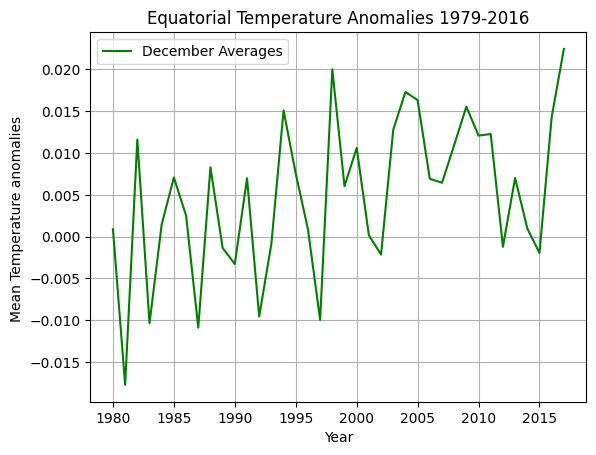

<Figure size 1200x600 with 0 Axes>

In [ ]:
data = pd.read_csv('NOAAGlobalT.csv')
data = data.replace(-999.999, 0)
equator = data[(data['LAT'] == -2.5 ) | (data['LAT'] == 2.5 ) | (data['LAT'] == -7.5 ) | (data['LAT'] == 7.5 )].values
equator[equator == -9.999e+02] = np.nan
print(equator)
equatormeans = (equator[:72] + equator[72:144] + equator[144:216] + equator[216:])/4
increment = 0
increment2 = 0
increment3 = 0
for i in equatormeans:  
    # 1979-1880 = 99 years, 99 * 12 = 1188 months + 9 from january to october, 1197 months into NOAAGlobalT
    # , 1197 + 3 = 1200: since first month is on index 3, 1203 for january 1979
    
    meansum = i[1203::] + increment
    increment =  i[1203::]
    product = meansum/len(equatormeans)
    t = np.linspace(1979, 2017, len(product))
    
    # March
    meansum = i[1205::12] + increment
    increment =  i[1205::12]
    marproduct = meansum/len(equatormeans)
    mart = np.linspace(1979, 2017, len(marproduct))



    # december
    meansum = i[1202::12] + increment2
    increment2 =  i[1202::12]
    decproduct = meansum/len(equatormeans)
    dect = np.linspace(1980, 2017, len(decproduct))

    # August
    meansum = i[1210::12] + increment3
    increment3 =  i[1210::12]
    augproduct = meansum/len(equatormeans)
    augt = np.linspace(1979, 2017, len(augproduct))
# plt.plot(mart, marproduct,"-", label='March Averages', color='orange', lw=1.5)
# plt.plot(augt, augproduct,"-", label='August Averages', color='blue', lw=1.5)
plt.plot(dect, decproduct,"-", label='December Averages', color='green', lw=1.5)
# print(product)
# values_Auckland = data_Auckland[0, 3:]
# plt.plot(t, productaug,"-", color="red")
plt.title('Equatorial Temperature Anomalies 1979-2016')
plt.xlabel("Year")
plt.ylabel("Mean Temperature anomalies ")
plt.grid()
plt.legend()
plt.figure(figsize=(12, 6))
plt.show() 

In [ ]:
# import netCDF4 as nc

# ncd = nc.Dataset('3363b02cb19a9f8696814d32cc2774d0.nc',"r+")

# # # define variables
# # lon_vals = ncd.variables['lon'][:]
# # lat_vals = ncd.variables['lat'][:]
# # time = ncd.variables['time']
# # time_unit = time.units
# # precnc = ncd.variables['precip']
# print(ncd)
# print(ncd['number'])